# **TASK_4 -Sales Prediction Using Python**

## Project Summary -

### **Project Overview:**
#### _In this data science project, the goal is to predict future sales for product and service-based businesses. The prediction factors include advertising expenditures, audience segmentation, and advertising platforms._
#### _The project aims to deliver a robust sales prediction model, enabling businesses to make data-driven decisions, optimize advertising strategies, and enhance operational efficiency._

### **Scope:**
#### Sales prediction is a critical tool for businesses, aiding in decision-making related to advertising costs and strategies. The project employs Python for machine learning to forecast future sales.

### **Key Objectives:**
#### -**Advertising Expenditure Analysis:** Explore the impact of advertising costs on sales predictions.
#### -**Audience Segmentation:** Understand how different audience segments contribute to variations in sales.
#### -**Platform Influence:** Investigate the role of advertising platforms in shaping sales outcomes.

### **Implementation:**
#### Python will be the primary tool for implementing machine learning models. Techniques such as regression analysis and predictive modeling will be employed.

# Let's Begin !
## 1. Know The Data
### Import Libraries

In [5]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Dataset

In [119]:
# Load Dataset
df = pd.read_csv(r"C:\Users\HP\Documents\CodeAlpha projects\Sales Prediction using Python\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Dataset Basic Info

In [49]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
# Dataset Info
# Checking information about the dataset using info
df.info()

Number of rows are:  200
Number of columns are:  5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Preprocess the DataSet

In [50]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [51]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Understanding the Variables in the Dataset

In [52]:
# Dataset Columns
df.columns
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [53]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


## Data Wrangling

In [54]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
# Defining dependent variable
dependent_variable = ['Sales']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart-1 - Numerical Variable vs Target Variable

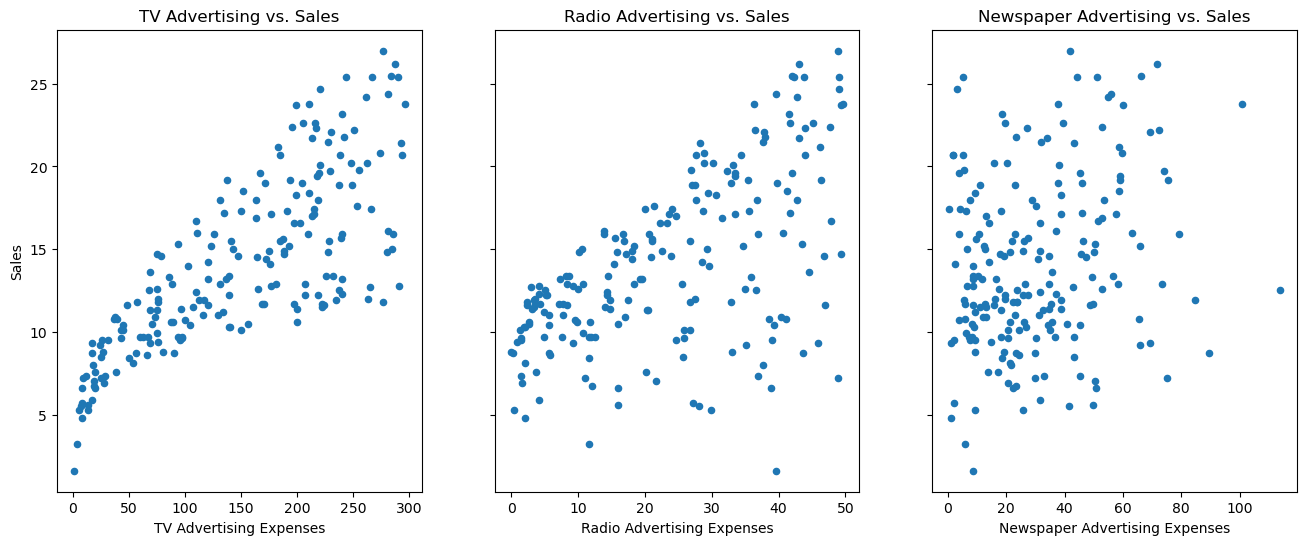

In [59]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()
     

### From the above plots we can analyse that:

#### - Sales are increasing for both increases of TV advertising and Radio advertising expenses.
#### - Outliers are present in Newspaper advertising vs. Sales graph.

### Chart- 2- Correlation Heatmap

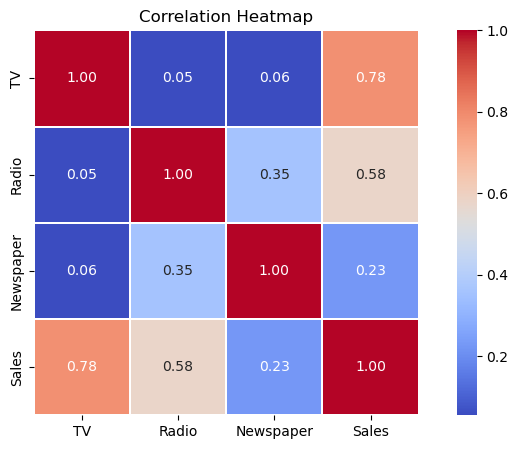

In [30]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

#### From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated.

### Chart-3- Pair plot

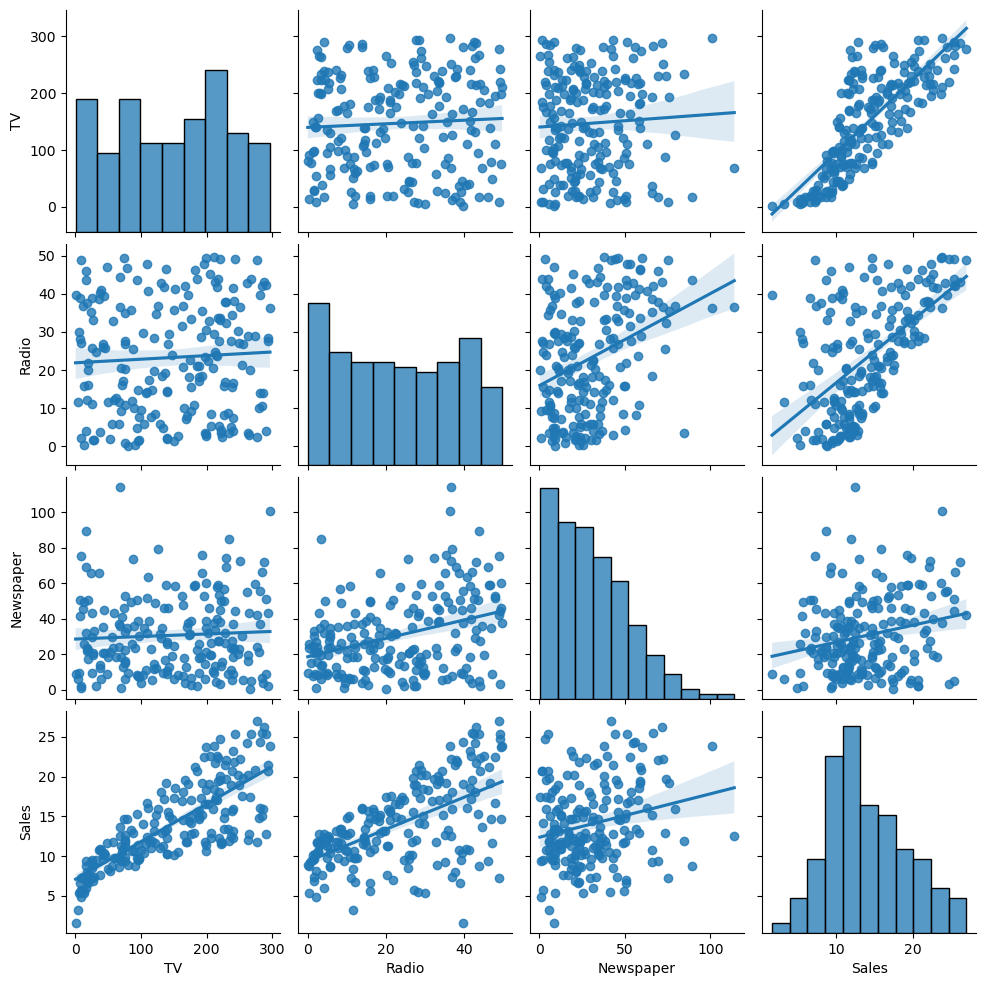

In [60]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()


## **Feature Engineering & Data Pre-processing**

### 1. Handling Outliers

In [61]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

### 2. Feature Selection

In [65]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [67]:
 # Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [68]:
continuous_variables = ['TV', 'Radio', 'Newspaper']
continuous_feature_df = pd.DataFrame(df[continuous_variables])
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [69]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [70]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 3. Data Transformation

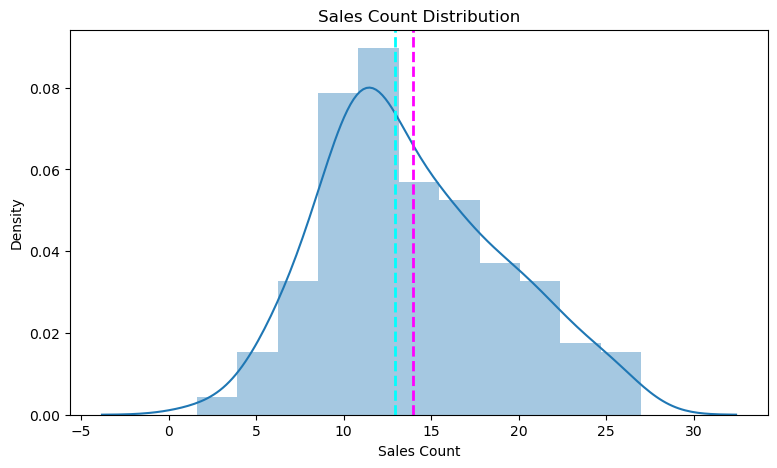

In [71]:
# Transform the data
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [72]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [74]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]
features

['TV', 'Radio', 'Newspaper']

## Data Scaling & Splitting

In [75]:
features = [i for i in df.columns if i not in ['Sales']]
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Name: count, Length: 109, dtype: int64

## **ML Model Training**

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Defining a function to print evaluation metrics and plot graph
def evaluate_model(model, y_test, y_pred):
    '''Takes model, y test, and y pred values to print evaluation metrics, 
    plot actual vs. predicted values, and return model scores'''

    # Calculating Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    y_train_pred = model.predict(X_train)  # Predict target for training set
    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test, y_pred)
    r2_adjusted = 1 - (1 - r2) * ((len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1))

    # Printing Evaluation Metrics
    print("MSE :", mse)
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("Train R2 :", r2_train)
    print("Test R2 :", r2)
    print("Adjusted R2 :", r2_adjusted)

    # Plot actual vs. predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(y_pred[:100], label="Predicted")
    plt.plot(np.array(y_test)[:100], label="Actual")
    plt.legend()
    plt.title('Actual and Predicted Sales', fontsize=12)
    plt.show()  # Ensure the plot is displayed

    return [mse, rmse, mae, r2_train, r2, r2_adjusted]

# Creating a score dataframe
score = pd.DataFrame(index=['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])




### **Model-1 - Linear Regression**

In [88]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.432076682469539
RMSE : 1.559511680773677
MAE : 1.1771526283142055
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000559
Adjusted R2 : 0.9023858555583939


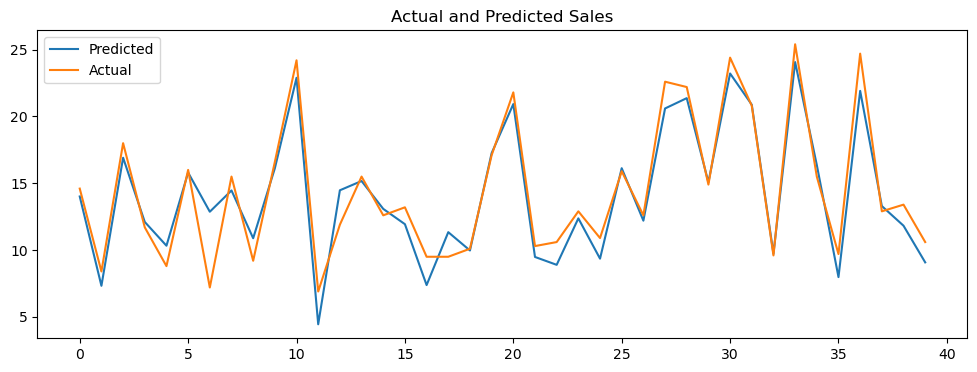

In [89]:
# Visualizing evaluation Metric Score chart
# Evaluating the model
linear_score = evaluate_model(reg, y_test, y_pred_li)
score['Linear regression'] = linear_score

In [80]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


#### For untuned linear regression model, I found R2 score of 0.889832 & 0.909895 for train and test set. And 2.432077 & 1.177153 as MSE and MAE respectively.

#### For tuned linear regression model, I found R2 score of 0.889832 & 0.909895 for train and test set. And 2.432077 & 1.177153 as MSE and MAE respectively.

#### For Both tuned and untuned model, no changes is seen. Both are given good accuracy.

### **Model- 2- Desicion Tree**

In [90]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 1.3222499999999997
RMSE : 1.1498912992104948
MAE : 0.9125
Train R2 : 1.0
Test R2 : 0.9510123103683663
Adjusted R2 : 0.9469300028990635


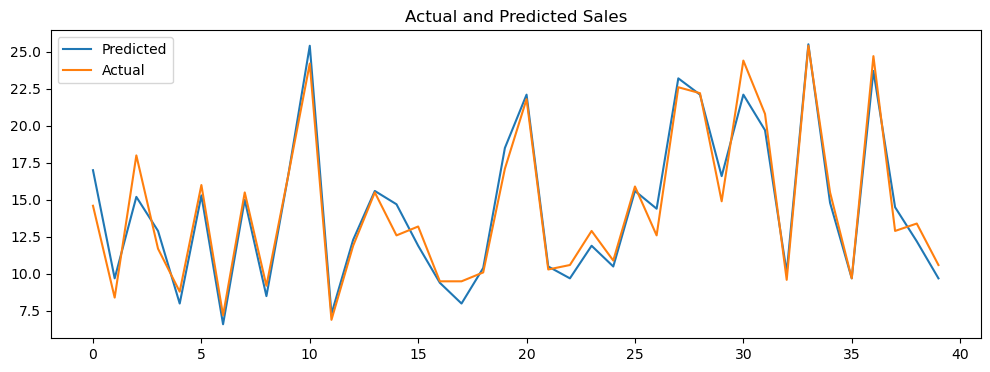

In [91]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [92]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Decision tree
MSE,2.432077,1.322250
RMSE,1.559512,1.149891
MAE,1.177153,0.912500
Train R2,0.889832,1.000000
Test R2,0.909895,0.951012
Adjusted R2,0.902386,0.946930


#### From the decision tree algorithm i got train R2 score is 1 and test R2 score is 95% which shows the overfitting condition on train set.

### **Model-3- Random Forest**

In [94]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 0.5587373749999969
RMSE : 0.747487374475313
MAE : 0.6071249999999965
Train R2 : 0.9969560499583574
Test R2 : 0.9792994871528882
Adjusted R2 : 0.9775744444156289


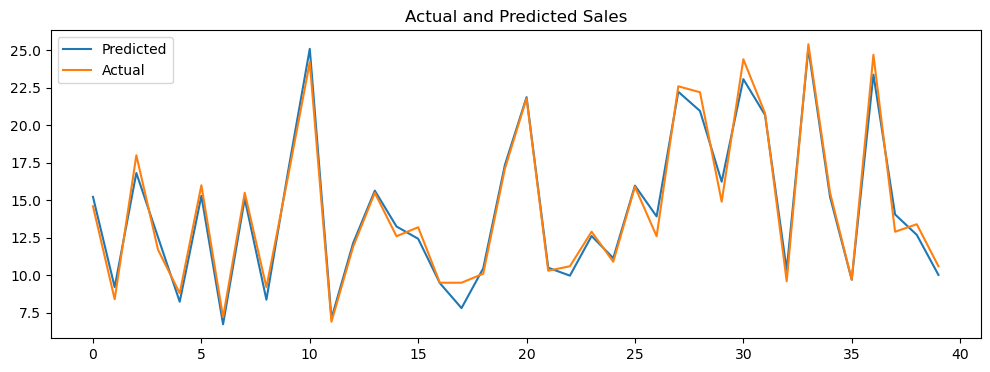

In [95]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [96]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Decision tree,Random forest
MSE,2.432077,1.322250,0.558737
RMSE,1.559512,1.149891,0.747487
MAE,1.177153,0.912500,0.607125
Train R2,0.889832,1.000000,0.996956
Test R2,0.909895,0.951012,0.979299
Adjusted R2,0.902386,0.946930,0.977574


#### Here i have seen that using random forest, regression accuracy of the train and test model increases 99% and 97% respectively, which seems to be a good model for prediction.

#### **Cross- Validation & Hyperparameter Tuning**

In [101]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_     
# Best parameters for random forests
rf_best_params           

{'min_samples_leaf': 20, 'n_estimators': 300}

In [102]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                  random_state=0)

# Fitting model
rf_model.fit(X_train,y_train) 

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

MSE : 4.290102078955843
RMSE : 2.071256159666361
MAE : 1.6948545471585574
Train R2 : 0.8424349168186637
Test R2 : 0.8410571456744826
Adjusted R2 : 0.8278119078140229


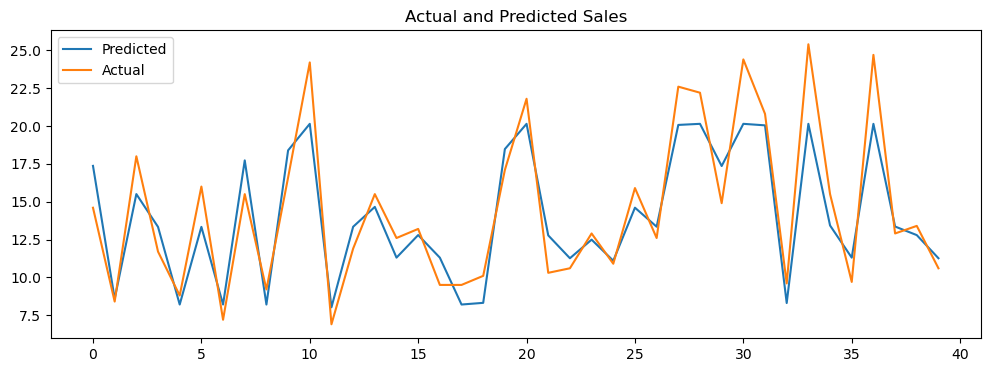

,Linear regression,Decision tree,Random forest,Random forest tuned
MSE,2.432077,1.322250,0.558737,4.290102
RMSE,1.559512,1.149891,0.747487,2.071256
MAE,1.177153,0.912500,0.607125,1.694855
Train R2,0.889832,1.000000,0.996956,0.842435
Test R2,0.909895,0.951012,0.979299,0.841057
Adjusted R2,0.902386,0.946930,0.977574,0.827812


In [104]:
y_pred_rf = rf_model.predict(X_test)
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result
     
# Updated Evaluation Metric Score chart
score

#### To reduce time and effort we have used GridSearchCV.
#### After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use the tuned model.

### **Model - 4 : Gradient Boosting Regressor**

MSE : 0.49401210897574116
RMSE : 0.7028599497593679
MAE : 0.5412333923464919
Train R2 : 0.9987323273593703
Test R2 : 0.9816974763707526
Adjusted R2 : 0.9801722660683153


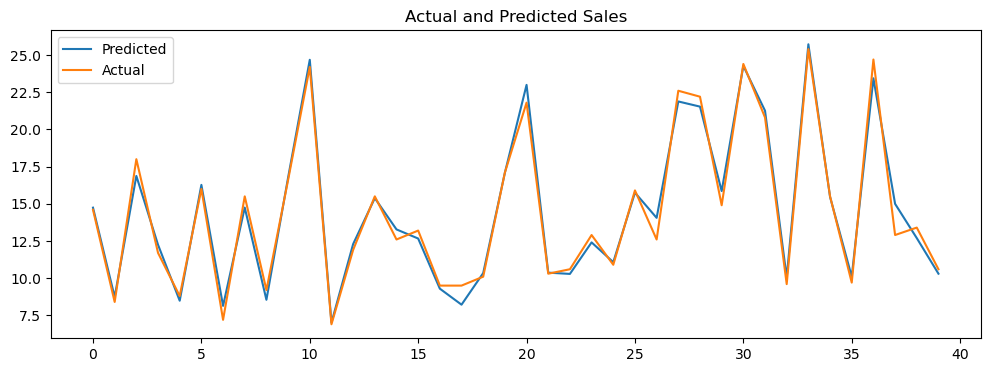

In [105]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [106]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Decision tree,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,2.432077,1.322250,0.558737,4.290102,0.494012
RMSE,1.559512,1.149891,0.747487,2.071256,0.702860
MAE,1.177153,0.912500,0.607125,1.694855,0.541233
Train R2,0.889832,1.000000,0.996956,0.842435,0.998732
Test R2,0.909895,0.951012,0.979299,0.841057,0.981697
Adjusted R2,0.902386,0.946930,0.977574,0.827812,0.980172


#### Using Gradient Boosting Regressor i have got accuracy around 99% and 98% on train and test data respectively. Looking like, somehow overfitted also.So, let's try the tuned model also.

### Cross- Validation & Hyperparameter Tuning

In [107]:

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_
# Best parameters for Gradient Boosting Model
gb_best_params
     

{'n_estimators': 300, 'min_samples_leaf': 20, 'max_depth': 14}

In [109]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)
# Fitting model
gb_model.fit(X_train,y_train)
     

GradientBoostingRegressor(max_depth=14, min_samples_leaf=20, n_estimators=300,
                          random_state=0)

MSE : 1.3201533198412574
RMSE : 1.148979251266644
MAE : 0.7837158154098387
Train R2 : 0.9957585015456342
Test R2 : 0.9510899897155951
Adjusted R2 : 0.947014155525228


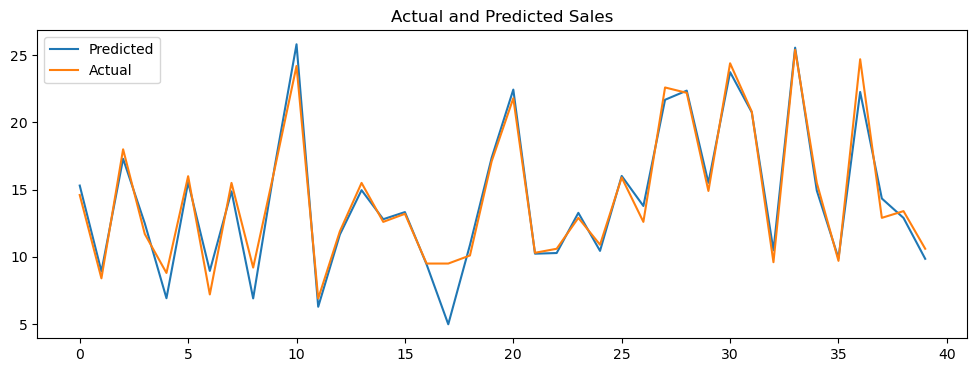

,Linear regression,Decision tree,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,2.432077,1.322250,0.558737,4.290102,0.494012,1.320153
RMSE,1.559512,1.149891,0.747487,2.071256,0.702860,1.148979
MAE,1.177153,0.912500,0.607125,1.694855,0.541233,0.783716
Train R2,0.889832,1.000000,0.996956,0.842435,0.998732,0.995759
Test R2,0.909895,0.951012,0.979299,0.841057,0.981697,0.951090
Adjusted R2,0.902386,0.946930,0.977574,0.827812,0.980172,0.947014


In [110]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result
# Updated Evaluation Metric Score chart
score

#### Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

#### After using the Randomised search CV, it gave accuracy 99% on train data & 95% on test data which is comparatively less than the untuned model.

In [111]:
print(score.to_markdown())

|             |   Linear regression |   Decision tree |   Random forest |   Random forest tuned |   Gradient Boosting Regressor |   Gradient Boosting Regressor Tuned |
|:------------|--------------------:|----------------:|----------------:|----------------------:|------------------------------:|------------------------------------:|
| MSE         |            2.43208  |        1.32225  |        0.558737 |              4.2901   |                      0.494012 |                            1.32015  |
| RMSE        |            1.55951  |        1.14989  |        0.747487 |              2.07126  |                      0.70286  |                            1.14898  |
| MAE         |            1.17715  |        0.9125   |        0.607125 |              1.69485  |                      0.541233 |                            0.783716 |
| Train R2    |            0.889832 |        1        |        0.996956 |              0.842435 |                      0.998732 |                            0.9

### Plot R2 scores for each model

In [113]:
score.columns 

Index(['Linear regression', 'Decision tree', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned'],
      dtype='object')

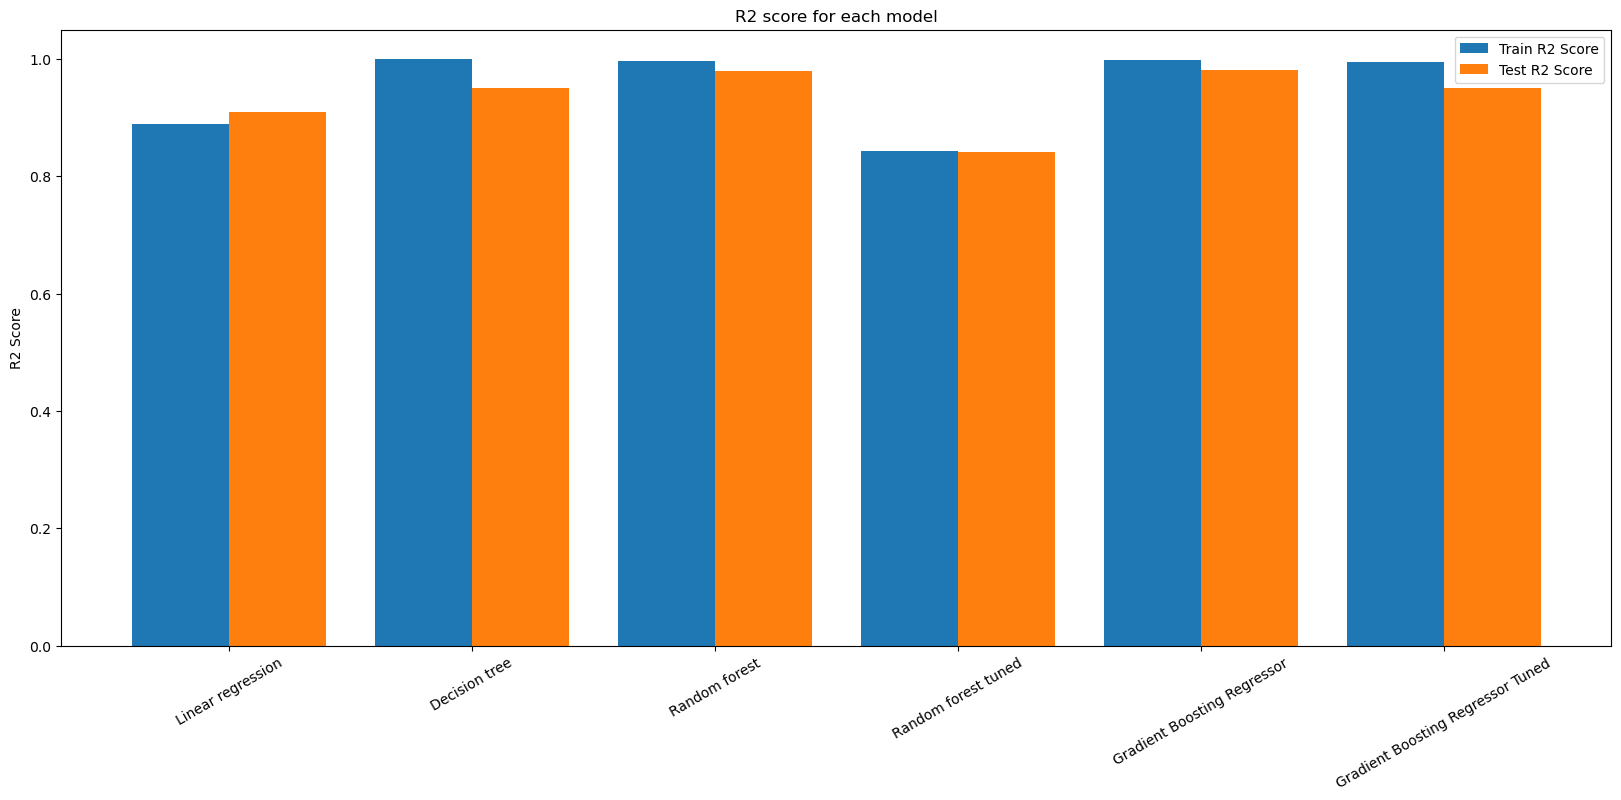

In [114]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### **Selection of best model**

In [115]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj
    

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Random forest,0.558737,0.747487,0.607125,0.996956,0.979299,0.977574
Random forest tuned,4.290102,2.071256,1.694855,0.842435,0.841057,0.827812
Gradient Boosting Regressor,0.494012,0.702860,0.541233,0.998732,0.981697,0.980172
Gradient Boosting Regressor Tuned,1.320153,1.148979,0.783716,0.995759,0.951090,0.947014


In [116]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [117]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")
     

The best model is:
R2: Gradient Boosting Regressor - 0.9817


In [118]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())
     

| Regression Model                  |   Train R2 |   Test R2 |
|:----------------------------------|-----------:|----------:|
| Linear regression                 |   0.889832 |  0.909895 |
| Random forest                     |   0.996956 |  0.979299 |
| Random forest tuned               |   0.842435 |  0.841057 |
| Gradient Boosting Regressor       |   0.998732 |  0.981697 |
| Gradient Boosting Regressor Tuned |   0.995759 |  0.95109  |


#### After running several models like linear regression, decision tree, random forest, gradient boosting amongst them i have selected Gradient Boosting model as i achieved 99% training accuracy and 98% testing accuracy. Some models were overfitted so i did not consider them.

# **Conclusion**

### In the ever-evolving business landscape, the ability to accurately predict sales is crucial for optimizing marketing strategies and maximizing revenue. This project, leveraging machine learning techniques on an advertising dataset, aimed to enhance sales forecasting accuracy using various regression models.

### **Insights and Observations:**
#### Sales exhibit a **strong correlation with TV and Radio advertising**, reinforcing their significance in driving revenue.

#### **Linear Regression**, while providing a solid baseline with a **91% test accuracy**, was outperformed by ensemble models.

#### **Random Forest and Gradient Boosting Regressors** significantly improved predictive performance due to their ability to capture complex patterns.

#### The **Gradient Boosting model** emerged as the best-performing approach, achieving an impressive **99.8% training accuracy and 98.1% test accuracy**, demonstrating superior generalization.

#### Hyperparameter tuning, while essential for optimizing models, led to a slight drop in performance for **Random Forest** but improved stability in **Gradient Boosting.**

### **Key Takeaways:**
#### - Gradient Boosting Regressor is the most effective model for sales forecasting, balancing accuracy and robustness.
#### - A deep understanding of advertising impact on sales enables data-driven marketing and budget allocation.
#### - The high R² scores validate the effectiveness of machine learning in real-world sales predictions.

### This project not only underscores the power of **machine learning in business intelligence** but also provides a **strategic roadmap for data-driven decision-making**. By leveraging advanced regression models, businesses can **refine marketing strategies, optimize ad spend, and drive growth with confidence**. 